In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
repair_data = pd.read_excel("C:\\Users\\kibe\\Downloads\\RepairData.xlsx")

In [3]:
repair_data.head()

,Transaction ID,Transaction Date,Account Name,Transaction Description,Transaction Line Description,Amount (One column),,Debit Amount (Two Column Approach),Credit Amount (Two Column Approach),Other Accounts for this Transaction,...,Bill Number,Notes / Memo,Amount Before Sales Tax,Sales Tax Amount,Sales Tax Name,Transaction Date Added,Transaction Date Last Modified,Account Group,Account Type,Account ID
0,6.274847e+17,2019-02-04,Parts & Materials Sales,KBU 765H - 35,KBU 765H - 35 - Workshop engine oil,2730.0,NaN,NaN,2730.0,Accounts Receivable,...,NaN,NaN,2730.0,NaN,NaN,2019-03-04,2022-05-26,Income,Income,NaN
1,6.274847e+17,2019-02-04,Parts & Materials Sales,KBU 765H - 35,KBU 765H - 35 - Nissan Oil Filters,650.0,NaN,NaN,650.0,Accounts Receivable,...,NaN,NaN,650.0,NaN,NaN,2019-03-04,2022-05-26,Income,Income,NaN
2,6.274847e+17,2019-02-04,Parts & Materials Sales,KBU 765H - 35,KBU 765H - 35 - Nissan Aircleaner,1200.0,NaN,NaN,1200.0,Accounts Receivable,...,NaN,NaN,1200.0,NaN,NaN,2019-03-04,2022-05-26,Income,Income,NaN
3,6.274847e+17,2019-02-04,Parts & Materials Sales,KBU 765H - 35,KBU 765H - 35 - Nissan Diesel / Fuel Filters,1400.0,NaN,NaN,1400.0,Accounts Receivable,...,NaN,NaN,1400.0,NaN,NaN,2019-03-04,2022-05-26,Income,Income,NaN
4,6.274847e+17,2019-02-04,Parts & Materials Sales,KBU 765H - 35,KBU 765H - 35 - Nissan fan belts,3515.0,NaN,NaN,3515.0,Accounts Receivable,...,NaN,NaN,3515.0,NaN,NaN,2019-03-04,2022-05-26,Income,Income,NaN


In [4]:
repair_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Transaction ID                       9520 non-null   float64       
 1   Transaction Date                     9520 non-null   datetime64[ns]
 2   Account Name                         9520 non-null   object        
 3   Transaction Description              9520 non-null   object        
 4   Transaction Line Description         9514 non-null   object        
 5   Amount (One column)                  9520 non-null   float64       
 6                                        0 non-null      float64       
 7   Debit Amount (Two Column Approach)   2932 non-null   float64       
 8   Credit Amount (Two Column Approach)  6588 non-null   float64       
 9   Other Accounts for this Transaction  9520 non-null   object        
 10  Customer    

In [5]:
repair_data_clean = repair_data[['Transaction Description','Transaction Line Description','Amount (One column)','Transaction Date','Invoice Number']].copy()

In [6]:
repair_data_clean.head()

,Transaction Description,Transaction Line Description,Amount (One column),Transaction Date,Invoice Number
0,KBU 765H - 35,KBU 765H - 35 - Workshop engine oil,2730.0,2019-02-04,35.0
1,KBU 765H - 35,KBU 765H - 35 - Nissan Oil Filters,650.0,2019-02-04,35.0
2,KBU 765H - 35,KBU 765H - 35 - Nissan Aircleaner,1200.0,2019-02-04,35.0
3,KBU 765H - 35,KBU 765H - 35 - Nissan Diesel / Fuel Filters,1400.0,2019-02-04,35.0
4,KBU 765H - 35,KBU 765H - 35 - Nissan fan belts,3515.0,2019-02-04,35.0


In [7]:
repair_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction Description       9520 non-null   object        
 1   Transaction Line Description  9514 non-null   object        
 2   Amount (One column)           9520 non-null   float64       
 3   Transaction Date              9520 non-null   datetime64[ns]
 4   Invoice Number                7921 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 372.0+ KB


In [8]:
#RENAMING COLUMN NAMES
repair_data_clean.rename(columns= {'Transaction Line Description':'Repair_Info'}, inplace= True) 
repair_data_clean.rename(columns= {'Amount (One column)':'Cost'}, inplace= True)
repair_data_clean.rename(columns= {'Transaction Date':'Date'}, inplace= True) 
repair_data_clean.rename(columns= {'Transaction Description':'Vehicle_Registration'}, inplace= True) 
repair_data_clean.rename(columns= {'Invoice Number':'Invoice_Number'}, inplace= True) 

In [9]:
repair_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Registration  9520 non-null   object        
 1   Repair_Info           9514 non-null   object        
 2   Cost                  9520 non-null   float64       
 3   Date                  9520 non-null   datetime64[ns]
 4   Invoice_Number        7921 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 372.0+ KB


In [10]:
#checking for null values
repair_data_clean['Repair_Info'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9520 entries, 0 to 9519
Series name: Repair_Info
Non-Null Count  Dtype 
--------------  ----- 
9514 non-null   object
dtypes: object(1)
memory usage: 74.5+ KB


In [11]:
repair_data_clean['Vehicle_Registration'].head()

0    KBU 765H - 35
1    KBU 765H - 35
2    KBU 765H - 35
3    KBU 765H - 35
4    KBU 765H - 35
Name: Vehicle_Registration, dtype: object

In [12]:
repair_data_clean.Vehicle_Registration

0         KBU 765H - 35
1         KBU 765H - 35
2         KBU 765H - 35
3         KBU 765H - 35
4         KBU 765H - 35
             ...       
9515    KCW 240A - 1398
9516    KCW 240A - 1398
9517    KCW 240A - 1398
9518    Invoice Payment
9519    Invoice Payment
Name: Vehicle_Registration, Length: 9520, dtype: object

In [13]:
#cleaning the repair info column
repair_data_clean['New_Repair_Info']=repair_data_clean['Repair_Info'].str[14:]
repair_data_clean.head()

,Vehicle_Registration,Repair_Info,Cost,Date,Invoice_Number,New_Repair_Info
0,KBU 765H - 35,KBU 765H - 35 - Workshop engine oil,2730.0,2019-02-04,35.0,- Workshop engine oil
1,KBU 765H - 35,KBU 765H - 35 - Nissan Oil Filters,650.0,2019-02-04,35.0,- Nissan Oil Filters
2,KBU 765H - 35,KBU 765H - 35 - Nissan Aircleaner,1200.0,2019-02-04,35.0,- Nissan Aircleaner
3,KBU 765H - 35,KBU 765H - 35 - Nissan Diesel / Fuel Filters,1400.0,2019-02-04,35.0,- Nissan Diesel / Fuel Filters
4,KBU 765H - 35,KBU 765H - 35 - Nissan fan belts,3515.0,2019-02-04,35.0,- Nissan fan belts


In [14]:
#Deleting the old repair information column
del repair_data_clean['Repair_Info']
#renaming the new repair information column
repair_data_clean.rename(columns= {'New_Repair_Info':'Repair_Info'}, inplace= True) 
repair_data_clean.head()

,Vehicle_Registration,Cost,Date,Invoice_Number,Repair_Info
0,KBU 765H - 35,2730.0,2019-02-04,35.0,- Workshop engine oil
1,KBU 765H - 35,650.0,2019-02-04,35.0,- Nissan Oil Filters
2,KBU 765H - 35,1200.0,2019-02-04,35.0,- Nissan Aircleaner
3,KBU 765H - 35,1400.0,2019-02-04,35.0,- Nissan Diesel / Fuel Filters
4,KBU 765H - 35,3515.0,2019-02-04,35.0,- Nissan fan belts


In [15]:
repair_data_clean.Vehicle_Registration

0         KBU 765H - 35
1         KBU 765H - 35
2         KBU 765H - 35
3         KBU 765H - 35
4         KBU 765H - 35
             ...       
9515    KCW 240A - 1398
9516    KCW 240A - 1398
9517    KCW 240A - 1398
9518    Invoice Payment
9519    Invoice Payment
Name: Vehicle_Registration, Length: 9520, dtype: object

In [16]:
#cleaning vehicle registration to show only the vehicle registration
repair_data_clean['vehicle_registration'] = repair_data_clean['Vehicle_Registration'].str[0:8]
repair_data_clean.Vehicle_Registration

0         KBU 765H - 35
1         KBU 765H - 35
2         KBU 765H - 35
3         KBU 765H - 35
4         KBU 765H - 35
             ...       
9515    KCW 240A - 1398
9516    KCW 240A - 1398
9517    KCW 240A - 1398
9518    Invoice Payment
9519    Invoice Payment
Name: Vehicle_Registration, Length: 9520, dtype: object

In [17]:
#to delete the vehicle registration column that was split
del repair_data_clean['Vehicle_Registration']
repair_data_clean.head()

,Cost,Date,Invoice_Number,Repair_Info,vehicle_registration
0,2730.0,2019-02-04,35.0,- Workshop engine oil,KBU 765H
1,650.0,2019-02-04,35.0,- Nissan Oil Filters,KBU 765H
2,1200.0,2019-02-04,35.0,- Nissan Aircleaner,KBU 765H
3,1400.0,2019-02-04,35.0,- Nissan Diesel / Fuel Filters,KBU 765H
4,3515.0,2019-02-04,35.0,- Nissan fan belts,KBU 765H


In [18]:
repair_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Cost                  9520 non-null   float64       
 1   Date                  9520 non-null   datetime64[ns]
 2   Invoice_Number        7921 non-null   float64       
 3   Repair_Info           9514 non-null   object        
 4   vehicle_registration  9520 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 372.0+ KB


In [19]:
#rearranging the table
repair_data_clean=repair_data_clean[['vehicle_registration','Repair_Info','Cost','Invoice_Number','Date']]
repair_data_clean.head()

,vehicle_registration,Repair_Info,Cost,Invoice_Number,Date
0,KBU 765H,- Workshop engine oil,2730.0,35.0,2019-02-04
1,KBU 765H,- Nissan Oil Filters,650.0,35.0,2019-02-04
2,KBU 765H,- Nissan Aircleaner,1200.0,35.0,2019-02-04
3,KBU 765H,- Nissan Diesel / Fuel Filters,1400.0,35.0,2019-02-04
4,KBU 765H,- Nissan fan belts,3515.0,35.0,2019-02-04


In [20]:
repair_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vehicle_registration  9520 non-null   object        
 1   Repair_Info           9514 non-null   object        
 2   Cost                  9520 non-null   float64       
 3   Invoice_Number        7921 non-null   float64       
 4   Date                  9520 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 372.0+ KB


In [21]:
repair_data_clean.head()

,vehicle_registration,Repair_Info,Cost,Invoice_Number,Date
0,KBU 765H,- Workshop engine oil,2730.0,35.0,2019-02-04
1,KBU 765H,- Nissan Oil Filters,650.0,35.0,2019-02-04
2,KBU 765H,- Nissan Aircleaner,1200.0,35.0,2019-02-04
3,KBU 765H,- Nissan Diesel / Fuel Filters,1400.0,35.0,2019-02-04
4,KBU 765H,- Nissan fan belts,3515.0,35.0,2019-02-04


In [25]:
#some entries in the cost column were in -ve to indicate credit so i changed the to positive values
repair_data_clean['Cost'] = repair_data_clean['Cost'].abs()
repair_data_clean['Cost']

0       2730.0
1        650.0
2       1200.0
3       1400.0
4       3515.0
         ...  
9515    3200.0
9516    1400.0
9517    4600.0
9518    4600.0
9519    4600.0
Name: Cost, Length: 9520, dtype: float64

<h1>Visualization<h1/>
<h2>First, we want to find out the cost of repairs per year<h2/>

I have sepearated the date into month day and year with the code below

In [22]:
repair_data_clean["day"] = repair_data_clean['Date'].map(lambda x: x.day)
repair_data_clean["month"] = repair_data_clean['Date'].map(lambda x: x.month)
repair_data_clean["year"] = repair_data_clean['Date'].map(lambda x: x.year)
repair_data_clean.head()

,vehicle_registration,Repair_Info,Cost,Invoice_Number,Date,day,month,year
0,KBU 765H,- Workshop engine oil,2730.0,35.0,2019-02-04,4,2,2019
1,KBU 765H,- Nissan Oil Filters,650.0,35.0,2019-02-04,4,2,2019
2,KBU 765H,- Nissan Aircleaner,1200.0,35.0,2019-02-04,4,2,2019
3,KBU 765H,- Nissan Diesel / Fuel Filters,1400.0,35.0,2019-02-04,4,2,2019
4,KBU 765H,- Nissan fan belts,3515.0,35.0,2019-02-04,4,2,2019


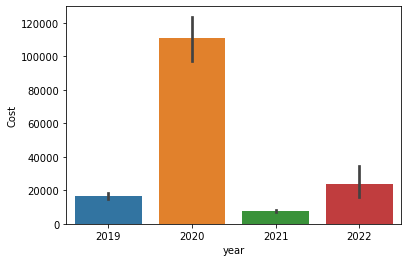

In [26]:
sns.barplot(x = 'year',
            y = 'Cost',
            data = repair_data_clean)
 
# Show the plot
plt.show()

From the barplot above, 20 is the year with the most repairs

<h2>To find out in which quarter were most repairs done per year<h2/>

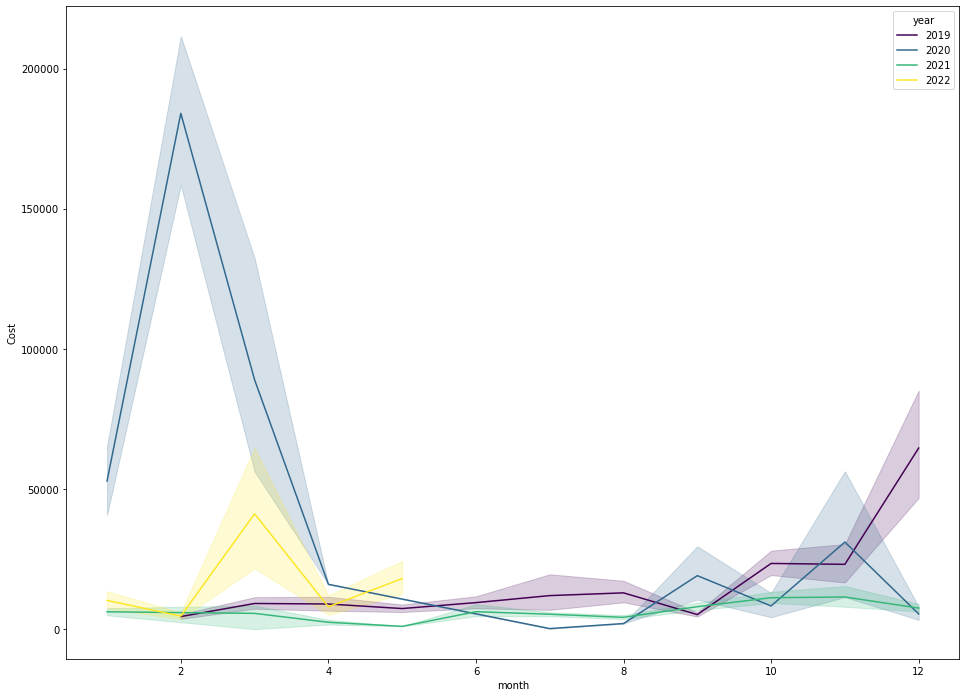

In [27]:
plt.figure(figsize = (16,12)) 
sns.lineplot(x = "month", y = "Cost", data = repair_data_clean, hue = "year",palette='viridis')
plt.show()

Most repairs were done in the first and last quarter consistently throughout the years